<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.4_n250.csv',
 'data_add_delta_-0.4_n120.csv',
 'data_add_delta_-0.4_n60.csv',
 'data_add_delta_-0.4_n30.csv',
 'data_add_delta_-0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,77.776728,37.529117,48.051014,0.203207,173.560066,173.328134,0.231932
1,0.0,1.0,23.892024,34.354761,28.263311,-0.245742,96.264354,96.486628,-0.222274
2,0.0,2.0,97.888426,53.223987,43.496415,-0.821686,203.787143,204.630014,-0.842871
3,0.0,3.0,25.755264,51.483301,70.060304,0.519233,157.818102,157.279967,0.538135
4,0.0,4.0,24.991444,77.342211,50.905226,-1.033436,162.205446,163.310175,-1.104729
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,85.192088,42.607381,32.814419,1.059552,171.673441,170.606427,1.067013
119996,999.0,116.0,93.834757,98.276745,55.844312,0.063542,258.019355,257.938813,0.080542
119997,999.0,117.0,31.901727,86.562183,53.941309,0.049997,182.455216,182.421642,0.033574
119998,999.0,118.0,97.676397,47.720973,32.768315,0.002532,188.168218,188.149251,0.018966


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,77.776728,37.529117,48.051014,0.203207,173.560066,173.328134,0.231932
1,0.0,1.0,23.892024,34.354761,28.263311,-0.245742,96.264354,96.486628,-0.222274
2,0.0,2.0,97.888426,53.223987,43.496415,-0.821686,203.787143,204.630014,-0.842871
3,0.0,3.0,25.755264,51.483301,70.060304,0.519233,157.818102,157.279967,0.538135
4,0.0,4.0,24.991444,77.342211,50.905226,-1.033436,162.205446,163.310175,-1.104729
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,85.192088,42.607381,32.814419,1.059552,171.673441,170.606427,1.067013
119996,999.0,116.0,93.834757,98.276745,55.844312,0.063542,258.019355,257.938813,0.080542
119997,999.0,117.0,31.901727,86.562183,53.941309,0.049997,182.455216,182.421642,0.033574
119998,999.0,118.0,97.676397,47.720973,32.768315,0.002532,188.168218,188.149251,0.018966


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    77.776728  37.529117  48.051014  ...  173.560066  173.328134  0.231932
      1.0    23.892024  34.354761  28.263311  ...   96.264354   96.486628 -0.222274
      2.0    97.888426  53.223987  43.496415  ...  203.787143  204.630014 -0.842871
      3.0    25.755264  51.483301  70.060304  ...  157.818102  157.279967  0.538135
      4.0    24.991444  77.342211  50.905226  ...  162.205446  163.310175 -1.104729
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  85.192088  42.607381  32.814419  ...  171.673441  170.606427  1.067013
      116.0  93.834757  98.276745  55.844312  ...  258.019355  257.938813  0.080542
      117.0  31.901727  86.562183  53.941309  ...  182.455216  182.421642  0.033574
      118.0  97.676397  47.720973  32.768315  ...  188.168218  188.149251  0.018966
      119.0  64.807809  29.309275  68.731886  ...  173.325749  172.904036  0.421712

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    77.776728  37.529117  48.051014  ...  173.560066  173.328134  0.231932
      1.0    23.892024  34.354761  28.263311  ...   96.264354   96.486628 -0.222274
      2.0    97.888426  53.223987  43.496415  ...  203.787143  204.630014 -0.842871
      3.0    25.755264  51.483301  70.060304  ...  157.818102  157.279967  0.538135
      4.0    24.991444  77.342211  50.905226  ...  162.205446  163.310175 -1.104729
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  85.192088  42.607381  32.814419  ...  171.673441  170.606427  1.067013
      116.0  93.834757  98.276745  55.844312  ...  258.019355  257.938813  0.080542
      117.0  31.901727  86.562183  53.941309  ...  182.455216  182.421642  0.033574
      118.0  97.676397  47.720973  32.768315  ...  188.168218  188.149251  0.018966
      119.0  64.807809  29.309275  68.731886  ...  173.325749  172.904036  0.421712

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,77.776728,37.529117,48.051014,0.203207,173.560066,173.328134,0.231932
1,0.0,1.0,23.892024,34.354761,28.263311,-0.245742,96.264354,96.486628,-0.222274
2,0.0,2.0,97.888426,53.223987,43.496415,-0.821686,203.787143,204.630014,-0.842871
3,0.0,3.0,25.755264,51.483301,70.060304,0.519233,157.818102,157.279967,0.538135
4,0.0,4.0,24.991444,77.342211,50.905226,-1.033436,162.205446,163.310175,-1.104729
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,85.192088,42.607381,32.814419,1.059552,171.673441,170.606427,1.067013
119996,999.0,116.0,93.834757,98.276745,55.844312,0.063542,258.019355,257.938813,0.080542
119997,999.0,117.0,31.901727,86.562183,53.941309,0.049997,182.455216,182.421642,0.033574
119998,999.0,118.0,97.676397,47.720973,32.768315,0.002532,188.168218,188.149251,0.018966


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    77.776728  37.529117  48.051014  ...  173.560066  173.328134  0.231932
      1.0    23.892024  34.354761  28.263311  ...   96.264354   96.486628 -0.222274
      2.0    97.888426  53.223987  43.496415  ...  203.787143  204.630014 -0.842871
      3.0    25.755264  51.483301  70.060304  ...  157.818102  157.279967  0.538135
      4.0    24.991444  77.342211  50.905226  ...  162.205446  163.310175 -1.104729
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  85.192088  42.607381  32.814419  ...  171.673441  170.606427  1.067013
      116.0  93.834757  98.276745  55.844312  ...  258.019355  257.938813  0.080542
      117.0  31.901727  86.562183  53.941309  ...  182.455216  182.421642  0.033574
      118.0  97.676397  47.720973  32.768315  ...  188.168218  188.149251  0.018966
      119.0  64.807809  29.309275  68.731886  ...  173.325749  172.904036  0.421712

[120000 rows x 7 columns]

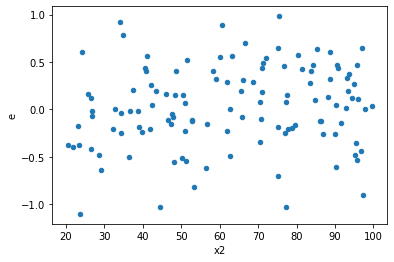

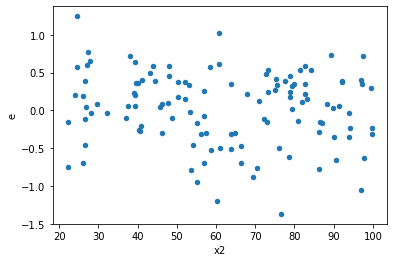

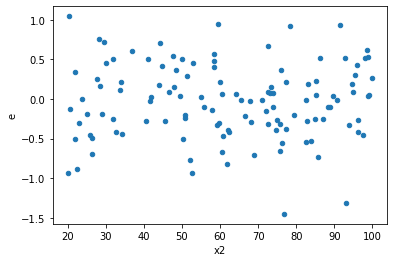

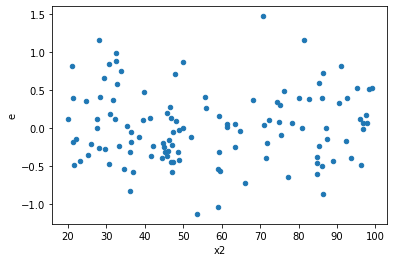

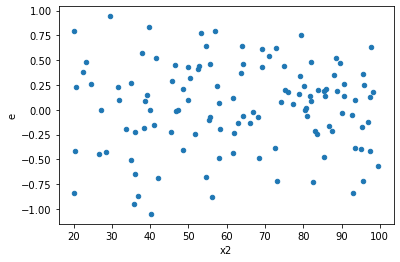

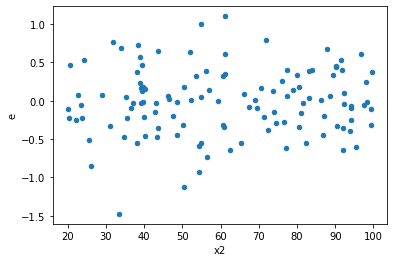

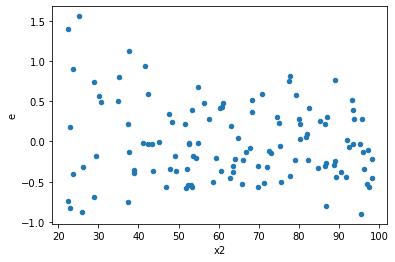

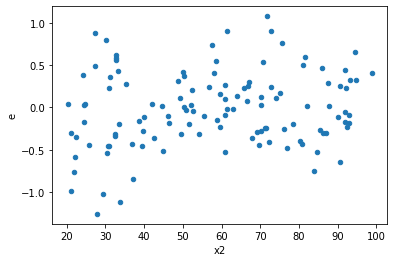

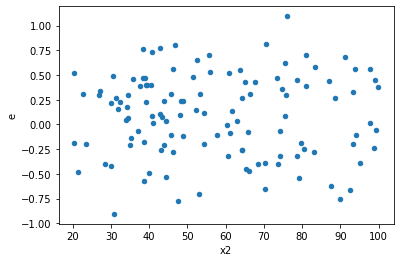

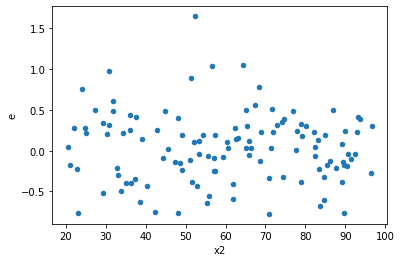

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,7.924388194914233,8.717981672134957,0.17609751544253852,0.1937329260474435,1.1001457093848634,0.7502642946484821,0.624867852675759,0.37513214732424105,Reject001=1 : Homoscedasticity
1.0,45.0,45.0,7.8578429413873625,8.93819087185882,0.17461873203083028,0.1986264638190849,1.1374865772362603,0.6675318618384942,0.6662340690807529,0.3337659309192471,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,8.459364884836932,10.509654824359867,0.18798588632970958,0.2335478849857748,1.242369251998811,0.46957469863238455,0.7652126506838077,0.23478734931619227,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,6.41191455477393,9.463691862666149,0.14248699010608734,0.2103042636148033,1.475954144713305,0.1954957741221206,0.9022521129389397,0.0977478870610603,Reject001=1 : Homoscedasticity
15.0,45.0,45.0,8.224467365642147,8.71617802883601,0.18276594145871436,0.19369284508524467,1.0597863230934557,0.8464333390597814,0.5767833304701093,0.4232166695298907,Reject001=1 : Homoscedasticity
25.0,45.0,45.0,7.754974414328949,8.80348154912543,0.17233276476286552,0.19563292331389842,1.135204460875995,0.6724076811468103,0.6637961594265949,0.33620384057340513,Reject001=1 : Homoscedasticity
37.0,45.0,45.0,7.0698032901062025,7.548901517590845,0.15710673978013784,0.16775336705757432,1.067766839871643,0.826892583871838,0.586553708064081,0.413446291935919,Reject001=1 : Homoscedasticity
43.0,45.0,45.0,8.116234528145723,12.269988234920927,0.1803607672921272,0.27266640522046504,1.5117833513029584,0.16953303049695623,0.9152334847515219,0.08476651524847811,Reject001=1 : Homoscedasticity
45.0,45.0,45.0,6.40085324095725,9.222511072332365,0.14224118313238335,0.20494469049627478,1.4408252658130207,0.22442528439255338,0.8877873578037233,0.11221264219627669,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,7.924388194914233,8.717981672134957,0.17609751544253852,0.1937329260474435,1.1001457093848634,0.7502642946484821,Reject001=1 : Homoscedasticity
1.0,45.0,45.0,7.8578429413873625,8.93819087185882,0.17461873203083028,0.1986264638190849,1.1374865772362603,0.6675318618384942,Reject001=1 : Homoscedasticity
2.0,45.0,45.0,10.488038349925262,9.263250262871058,0.23306751888722804,0.20585000584157906,0.8832204797322339,0.678819761531877,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,8.459364884836932,10.509654824359867,0.18798588632970958,0.2335478849857748,1.242369251998811,0.46957469863238455,Reject001=1 : Homoscedasticity
4.0,45.0,45.0,10.884836563155265,5.626792012645412,0.24188525695900587,0.12503982250323137,0.5169385851590897,0.029146306175533338,Reject001=1 : Homoscedasticity
5.0,45.0,45.0,9.940280197325357,5.945234457889684,0.22089511549611907,0.1321163212864374,0.598095258873022,0.08815182200136172,Reject001=1 : Homoscedasticity
6.0,45.0,45.0,13.863128711458353,6.520535662126085,0.30806952692129674,0.14490079249169077,0.47035094298277974,0.012876606875911483,Reject001=1 : Homoscedasticity
7.0,45.0,45.0,11.490793523734872,7.442237813638089,0.25535096719410827,0.16538306252529086,0.6476696146585293,0.14894679448572773,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,6.41191455477393,9.463691862666149,0.14248699010608734,0.2103042636148033,1.475954144713305,0.1954957741221206,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      935
Reject001=0 : Heteroscedasticity     65
Name: Result_test, dtype: int64